In [54]:
import pandas as pd
import numpy as np

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [56]:
results = pd.read_csv('data/auto_results.csv')
results.head()

,score1,score2,score3,label1,label2,label3,model
0,8.0,9.0,7.0,google,yandex,deepl,gpt-3.5-turbo-16k-0613
1,9.0,7.0,8.0,yandex,google,deepl,gpt-3.5-turbo-16k-0613
2,9.0,10.0,8.0,yandex,deepl,google,gpt-3.5-turbo-16k-0613
3,8.0,10.0,9.0,yandex,google,deepl,gpt-3.5-turbo-16k
4,7.0,8.0,6.0,google,yandex,deepl,gpt-3.5-turbo-16k


In [57]:
results.isna().sum()

score1    7
score2    7
score3    7
label1    7
label2    7
label3    7
model     7
dtype: int64

In [58]:
results.dropna(inplace=True)

In [59]:
from collections import defaultdict
results_dict = defaultdict(list)
# iterate over each row in the results dataframe
for i, row in results.iterrows():
    for idx in range(1,4):
        label = row[f'label{idx}']
        score = row[f'score{idx}']
        results_dict[label].append(score)

results_dict

defaultdict(list,
            {'google': [8.0,
              7.0,
              8.0,
              10.0,
              7.0,
              6.0,
              8.0,
              7.0,
              6.0,
              9.0,
              9.0,
              8.0,
              7.0,
              7.0,
              8.0,
              8.0,
              9.0,
              9.0,
              9.0,
              9.0,
              10.0,
              7.0,
              8.0,
              10.0,
              8.0,
              7.0,
              5.0,
              9.0,
              7.0,
              7.0,
              6.0,
              8.0,
              9.0,
              7.0,
              7.0,
              7.0,
              8.0,
              10.0,
              9.0,
              10.0,
              8.0,
              8.0,
              7.0,
              10.0,
              6.0,
              9.0,
              10.0,
              9.0,
              7.0,
              7.0,
              9

In [60]:
scores = pd.DataFrame(results_dict, dtype=int)
scores.head()

,google,yandex,deepl
0,8,9,7
1,7,9,8
2,8,9,10
3,10,8,9
4,7,8,6


In [61]:
scores.describe().loc[['mean', 'std', 'count']]

,google,yandex,deepl
mean,8.01476,7.988930,8.132841
std,1.33047,1.428502,1.389401
count,271.00000,271.000000,271.000000


In [62]:
# count values for each score
score_count = scores.apply(pd.Series.value_counts).fillna(0).astype(int)
score_count

,google,yandex,deepl
1,1,1,1
2,0,1,1
3,1,2,2
4,1,1,0
5,8,8,4
6,16,18,12
7,60,55,64
8,76,77,70
9,80,77,75
10,28,31,42


Text(0.5, 1.0, 'Scores for each translation service')

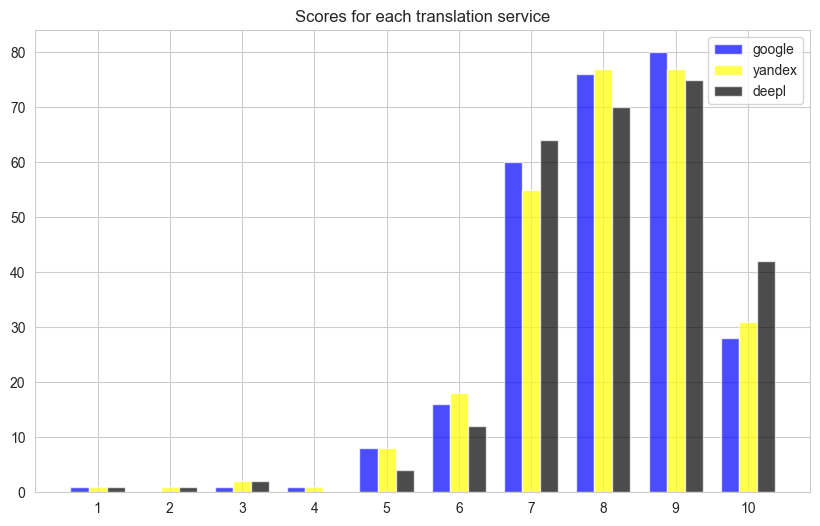

In [68]:

# google	yandex	deepl
# 1	1	1	0
# 3	0	1	1
# 5	7	3	3
# 6	4	6	3
# 7	27	17	19
# 8	25	27	30
# 9	21	32	31
# 10	13	11	11

# plot the scores (bar plot)
plt.figure(figsize=(10,6))
score_labels = score_count.index.astype(str)
alpha = 0.7
width = 0.25
delta = 0.05
plt.bar(score_count.index, score_count.google, label='google', alpha=alpha, color='blue', width=width)
plt.bar(score_count.index + width, score_count.yandex, label='yandex', alpha=alpha, color='yellow', width=width)
plt.bar(score_count.index + width*2, score_count.deepl, label='deepl', alpha=alpha, color='black', width=width)

# use another palette
# sns.set_palette('Set2') not good
# sns.set_palette('Set2', 10) not good
sns.set_palette('Set3')

plt.legend()
plt.xticks(score_count.index + width, score_labels)
plt.title('Scores for each translation service')